# Train CNN Example

In [1]:
import os
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import VGG16
from keras.models import load_model
import numpy as np

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


###  Dataset you may download here https://nomeroff.net.ua/datasets/autoriaNPCountryDataset-2019-01-14.zip

In [2]:
MAIN_DIR = "/mnt/data/home/probachaydmitry/Downloads/autoriaNPCountryDataset-2019-01-14"

TRAIN_DIR = os.path.join(MAIN_DIR, "train")
VAL_DIR   = os.path.join(MAIN_DIR, "validation")
TEST_DIR  = os.path.join(MAIN_DIR, "test")

In [3]:
datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = datagen.flow_from_directory(
                  TRAIN_DIR,
                  target_size=(64, 256),
                  batch_size=32,
                  class_mode='categorical')

val_generator   = datagen.flow_from_directory(
                  TEST_DIR,
                  target_size=(64, 256),
                  batch_size=32,
                  class_mode='categorical')

test_generator  = datagen.flow_from_directory(
                  VAL_DIR,
                  target_size=(64, 256),
                  batch_size=32,
                  class_mode='categorical')

Found 16682 images belonging to 6 classes.
Found 3825 images belonging to 6 classes.
Found 4238 images belonging to 6 classes.


### Lets build our first model

In [5]:
def build_1():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 256, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))
    
    return model

### relu activation function https://uk.wikipedia.org/wiki/ReLU
<img width="50%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Rectifier_and_softplus_functions.svg/1280px-Rectifier_and_softplus_functions.svg.png"></img>

In [6]:
model = build_1()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 254, 32)       896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 127, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 125, 64)       18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 30, 128)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 28, 128)        147584    
__________

### All layers, Conv2D and MaxPooling2D, derive a three-dimensional tensor with a shape (height, width, channels). The width and height measurements shrink with increasing network depth. The number of channels is controlled by the first argument passed to the Conv2D layers (32 or 64).

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

### Lets train!

In [8]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_generator,
    validation_steps=50)

loss, acc = model.evaluate_generator(test_generator, steps=100)
print(f"test loss: {loss}\ntest acc: {acc}")

Epoch 1/10
100/100 [==============================] - 53s 533ms/step - loss: 1.2297 - acc: 0.5019 - val_loss: 0.5336 - val_acc: 0.8494
Epoch 2/10
100/100 [==============================] - 53s 525ms/step - loss: 0.4073 - acc: 0.8631 - val_loss: 0.3519 - val_acc: 0.8919
Epoch 3/10
100/100 [==============================] - 51s 514ms/step - loss: 0.2705 - acc: 0.9197 - val_loss: 0.3247 - val_acc: 0.9035
Epoch 4/10
100/100 [==============================] - 54s 537ms/step - loss: 0.2096 - acc: 0.9363 - val_loss: 0.2148 - val_acc: 0.9306
Epoch 5/10
100/100 [==============================] - 53s 529ms/step - loss: 0.1626 - acc: 0.9509 - val_loss: 0.2183 - val_acc: 0.9369
Epoch 6/10
100/100 [==============================] - 51s 515ms/step - loss: 0.1421 - acc: 0.9556 - val_loss: 0.1950 - val_acc: 0.9413
Epoch 7/10
100/100 [==============================] - 52s 520ms/step - loss: 0.1555 - acc: 0.9572 - val_loss: 0.1689 - val_acc: 0.9569
Epoch 8/10
100/100 [==============================] - 5

### Train histogram

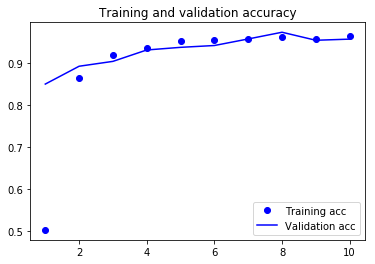

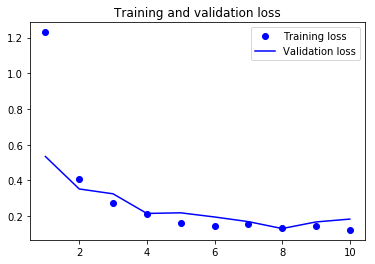

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Artificially increase our data

In [10]:
datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=4,
            shear_range=0.05,
            height_shift_range=0.05,
            zoom_range=[.95, 1.05],
            brightness_range=(0.5, 1.5),
            data_format='channels_last',
            channel_shift_range=0.05,
            fill_mode='nearest')

train_generator = datagen.flow_from_directory(
                  TRAIN_DIR,
                  target_size=(64, 256),
                  batch_size=32,
                  class_mode='categorical')

Found 16682 images belonging to 6 classes.


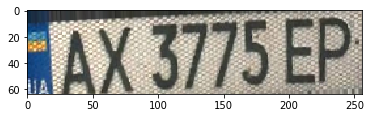

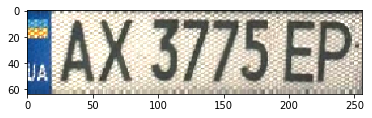

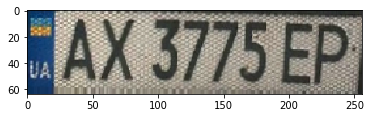

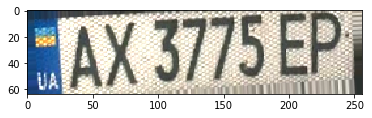

In [11]:
img_path = os.path.join(TRAIN_DIR, "1", "258534811.png")
img = image.load_img(img_path, target_size=(64, 256))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

### Lets train again!

In [12]:
model = build_1()
model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_generator,
    validation_steps=50)
loss, acc = model.evaluate_generator(test_generator, steps=100)
print(f"test loss: {loss}\ntest acc: {acc}")

Epoch 1/10
100/100 [==============================] - 58s 576ms/step - loss: 1.3776 - acc: 0.4234 - val_loss: 0.7866 - val_acc: 0.7094
Epoch 2/10
100/100 [==============================] - 56s 561ms/step - loss: 0.5495 - acc: 0.8153 - val_loss: 0.3293 - val_acc: 0.9028
Epoch 3/10
100/100 [==============================] - 58s 584ms/step - loss: 0.3333 - acc: 0.8966 - val_loss: 0.2843 - val_acc: 0.9256
Epoch 4/10
100/100 [==============================] - 54s 537ms/step - loss: 0.2630 - acc: 0.9153 - val_loss: 0.1901 - val_acc: 0.9406
Epoch 5/10
100/100 [==============================] - 59s 586ms/step - loss: 0.2181 - acc: 0.9331 - val_loss: 0.1783 - val_acc: 0.9483
Epoch 6/10
100/100 [==============================] - 53s 534ms/step - loss: 0.1889 - acc: 0.9453 - val_loss: 0.1508 - val_acc: 0.9644
Epoch 7/10
100/100 [==============================] - 54s 539ms/step - loss: 0.1757 - acc: 0.9456 - val_loss: 0.1820 - val_acc: 0.9584
Epoch 8/10
100/100 [==============================] - 5

### Now add dropout layer
<img src="https://cdn-images-1.medium.com/max/800/1*iWQzxhVlvadk6VAJjsgXgg.png"></img>

In [13]:
def build_2():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 256, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Flatten())
    
    # add here
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))
    
    return model

### And again!

In [14]:
model = build_2()
model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_generator,
    validation_steps=50)
loss, acc = model.evaluate_generator(test_generator, steps=100)
print(f"test loss: {loss}\ntest acc: {acc}")

Epoch 1/10
100/100 [==============================] - 53s 530ms/step - loss: 1.3794 - acc: 0.4646 - val_loss: 0.6461 - val_acc: 0.7744
Epoch 2/10
100/100 [==============================] - 53s 528ms/step - loss: 0.7010 - acc: 0.7544 - val_loss: 0.5995 - val_acc: 0.8360
Epoch 3/10
100/100 [==============================] - 54s 536ms/step - loss: 0.5117 - acc: 0.8256 - val_loss: 0.3731 - val_acc: 0.8800
Epoch 4/10
100/100 [==============================] - 53s 535ms/step - loss: 0.4005 - acc: 0.8616 - val_loss: 0.3013 - val_acc: 0.9148
Epoch 5/10
100/100 [==============================] - 53s 533ms/step - loss: 0.3155 - acc: 0.8937 - val_loss: 0.2582 - val_acc: 0.9294
Epoch 6/10
100/100 [==============================] - 53s 525ms/step - loss: 0.2828 - acc: 0.9125 - val_loss: 0.1768 - val_acc: 0.9502
Epoch 7/10
100/100 [==============================] - 55s 548ms/step - loss: 0.2591 - acc: 0.9169 - val_loss: 0.1546 - val_acc: 0.9581
Epoch 8/10
100/100 [==============================] - 5

In [15]:
model.save("model.h5")

### Using a pre-trained convolutional neural network

In [16]:
conv_base = VGG16(weights='imagenet',
    include_top=False,
    input_shape=(64, 256, 3))

conv_base.trainable = False
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 256, 3)        0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 256, 64)       1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 256, 64)       36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 128, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 128, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 128, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 64, 128)       0         
__________

In [17]:
def build_3():
    model = models.Sequential()
    model.add(conv_base)
    
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))
    return model

In [18]:
model = build_3()
model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_generator,
    validation_steps=50)
loss, acc = model.evaluate_generator(test_generator, steps=100)
print(f"test loss: {loss}\ntest acc: {acc}")

Epoch 1/10
100/100 [==============================] - 310s 3s/step - loss: 0.7189 - acc: 0.7874 - val_loss: 0.3462 - val_acc: 0.9180
Epoch 2/10
100/100 [==============================] - 310s 3s/step - loss: 0.2545 - acc: 0.9331 - val_loss: 0.2300 - val_acc: 0.9413
Epoch 3/10
100/100 [==============================] - 310s 3s/step - loss: 0.1995 - acc: 0.9475 - val_loss: 0.2584 - val_acc: 0.9268
Epoch 4/10
100/100 [==============================] - 312s 3s/step - loss: 0.1797 - acc: 0.9519 - val_loss: 0.1537 - val_acc: 0.9637
Epoch 5/10
100/100 [==============================] - 316s 3s/step - loss: 0.1480 - acc: 0.9625 - val_loss: 0.1611 - val_acc: 0.9637
Epoch 6/10
100/100 [==============================] - 310s 3s/step - loss: 0.1272 - acc: 0.9612 - val_loss: 0.1625 - val_acc: 0.9558
Epoch 7/10
100/100 [==============================] - 310s 3s/step - loss: 0.1225 - acc: 0.9681 - val_loss: 0.1562 - val_acc: 0.9519
Epoch 8/10
100/100 [==============================] - 311s 3s/step - 

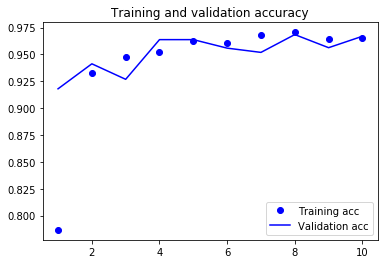

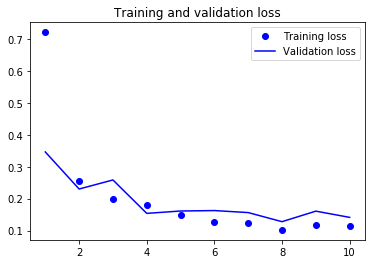

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Visualization

(1, 64, 256, 3)


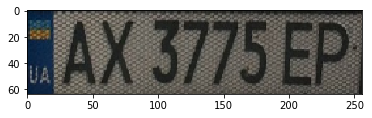

In [20]:
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)
plt.imshow(img_tensor[0])
plt.show()

(1, 62, 254, 32)


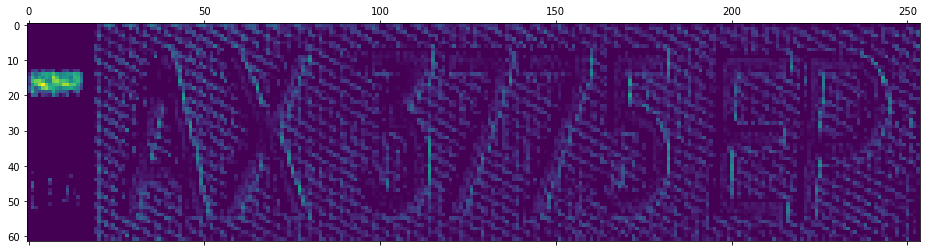

In [21]:
model = load_model('model.h5')

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]

print(first_layer_activation.shape)

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

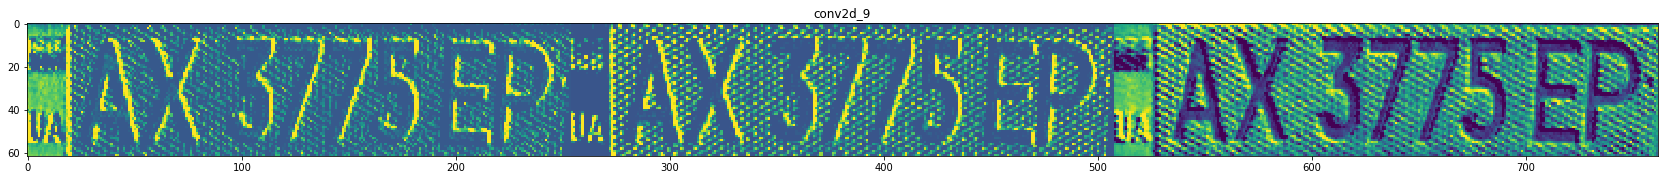

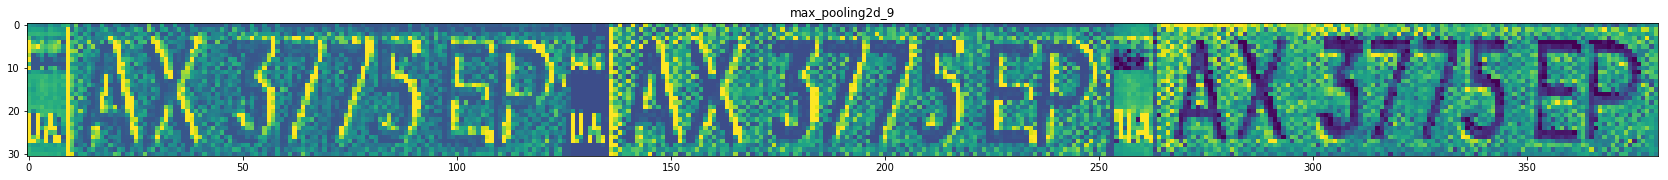

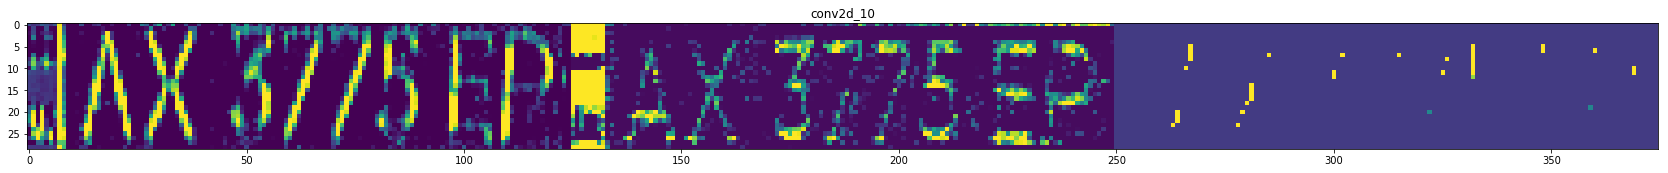

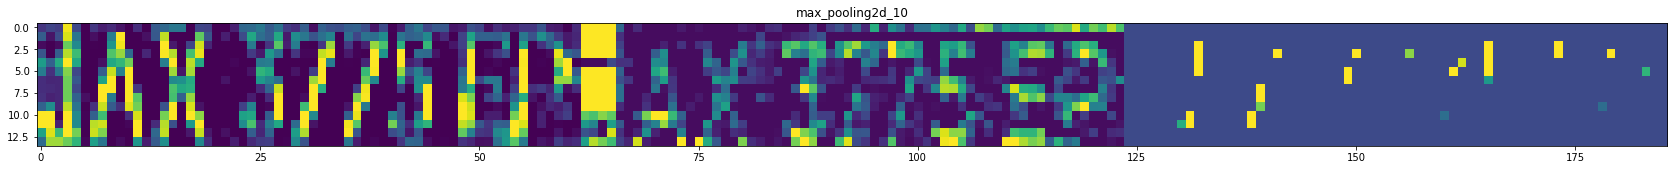

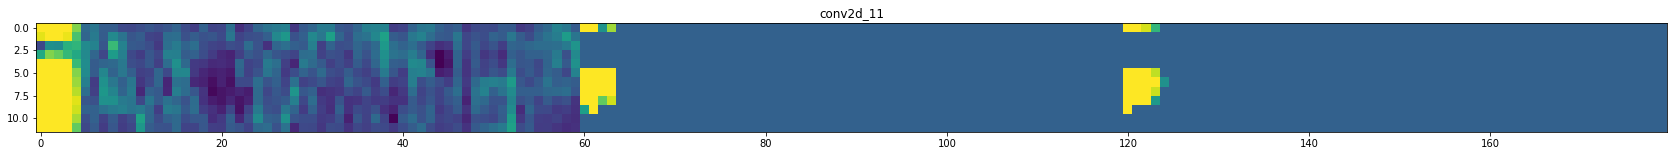

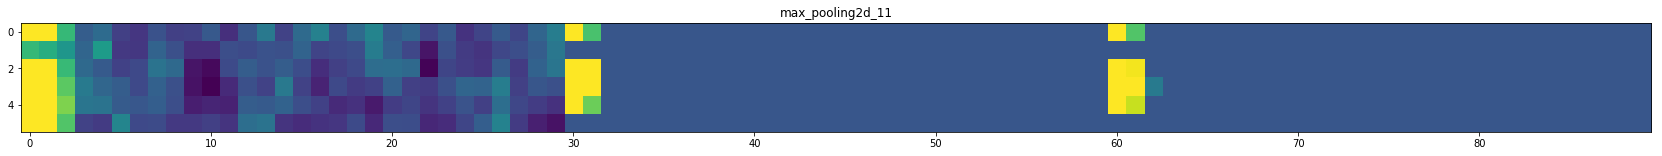

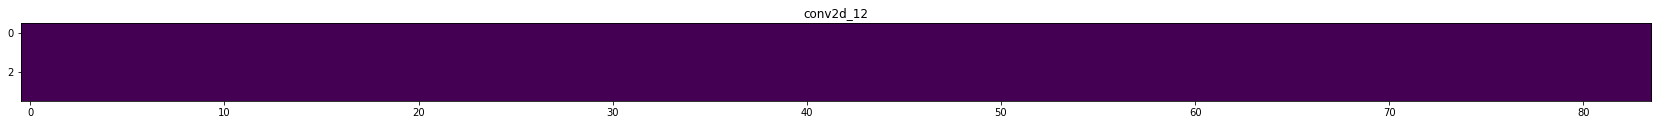

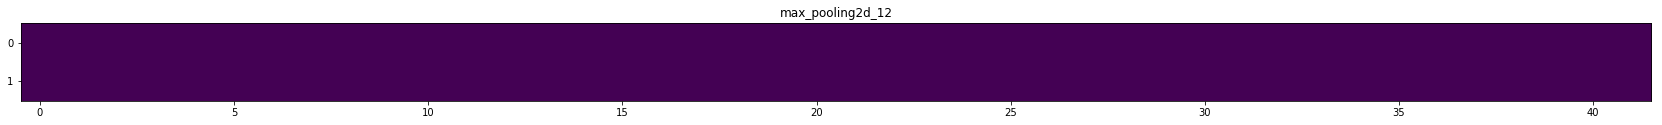

In [22]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

i = 0
images_per_row = 3
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[0]
    
    size_w = layer_activation.shape[1]
    size_h = layer_activation.shape[2]
    n_cols = n_features
    display_grid = np.zeros((size_w * n_cols, images_per_row * size_h))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size_w : (col + 1) * size_w,
                         row * size_h : (row + 1) * size_h] = channel_image
            i += 1
    scale = 10. / size_h
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.imshow(display_grid)